# IronHack Project - Linear Regression

## How much value this Diamond dataset ?

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

# Introducing diamond's dimensions

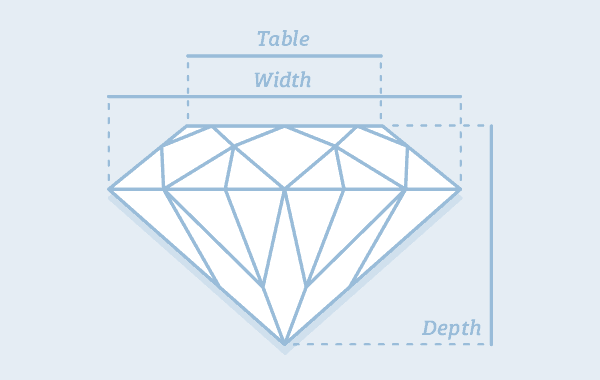

# The 4 C's

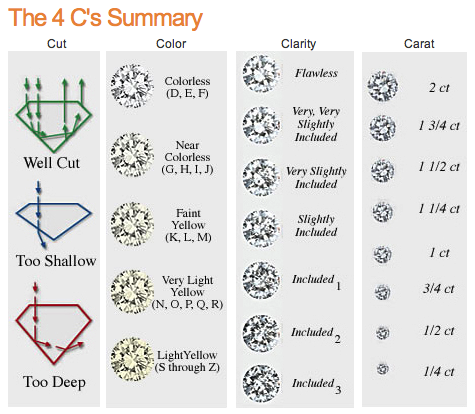

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
diamond = pd.read_csv('diamonds.csv')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [3]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Adjusting Categorical Values
| Column  | From  | To |
|---|---|---|
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  | Range from 0 (worst) to 4 (best) |
| Color  | Diamond colour, from J (worst) to D (best)  | Range from 0 (worst) to 6 (best)|
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   | Range from 0 (worst) to 7 (best) |

In [4]:
diamond['new_clarity'] = diamond['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
diamond['new_color'] = diamond['color'].replace({'D':6, 'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
diamond['new_cut']= diamond['cut'].replace({'Fair':0,'Good':1,'Very Good': 2, 'Premium':3,'Ideal':4})

# Correlations

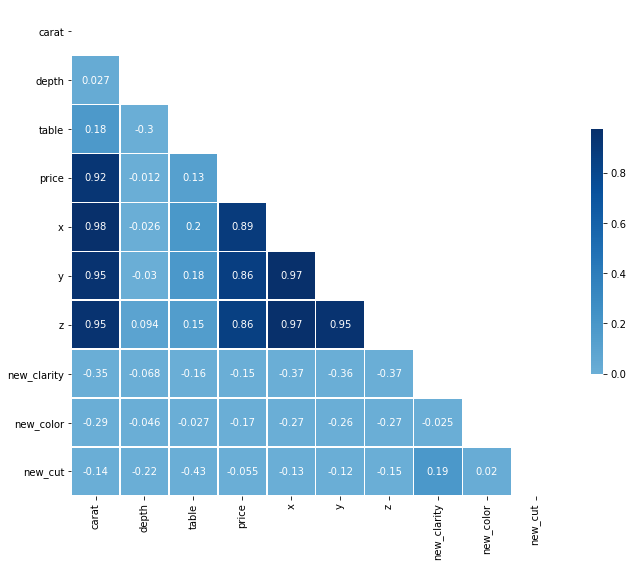

In [5]:
corr = diamond.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='Blues', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Linear Regression for each columns

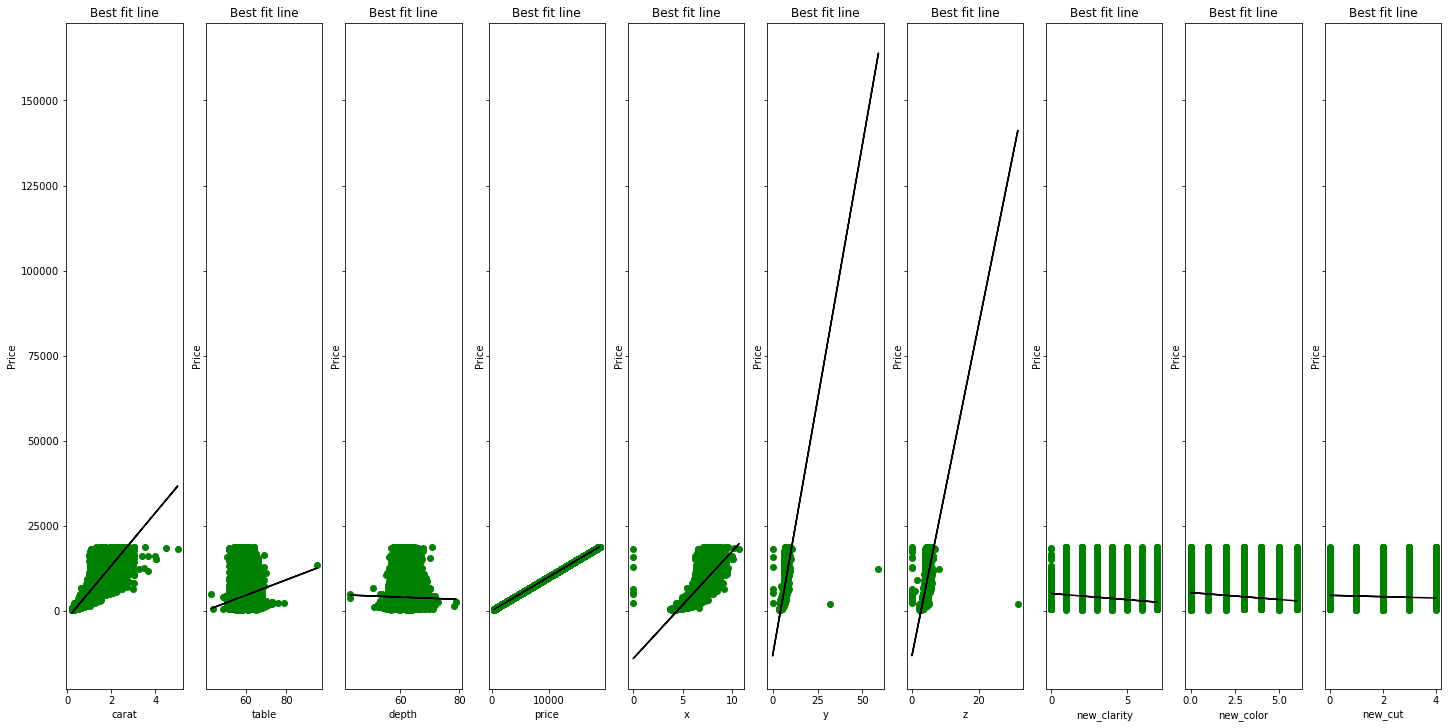

In [6]:
model = LinearRegression()

copy_diamond = diamond[['carat', 'table','depth', 'price', 'x', 'y','z', 'new_clarity', 'new_color', 'new_cut']]

y = copy_diamond['price']

fig, axes = plt.subplots(1,len(copy_diamond.columns.values),sharey=True,constrained_layout=True,figsize=(20,10))

for i,e in enumerate(copy_diamond.columns):
    model.fit(copy_diamond[e].values[:,np.newaxis], y.values)
    axes[i].set_title("Best fit line")
    axes[i].set_xlabel(str(e))
    axes[i].set_ylabel('Price')
    axes[i].scatter(copy_diamond[e].values[:,np.newaxis], y,color='g')
    axes[i].plot(copy_diamond[e].values[:,np.newaxis], 
    model.predict(copy_diamond[e].values[:,np.newaxis]),color='k')

# Linear Regression

In [7]:
X = diamond[['carat']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)

std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

print(f'Root Mean Squared Error: {(np.sqrt(mean_squared_error(y_test, predict))).round()}')

Root Mean Squared Error: 1560.0


# Divergent behavior

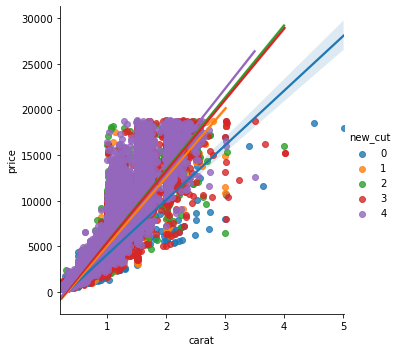

In [8]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_cut')

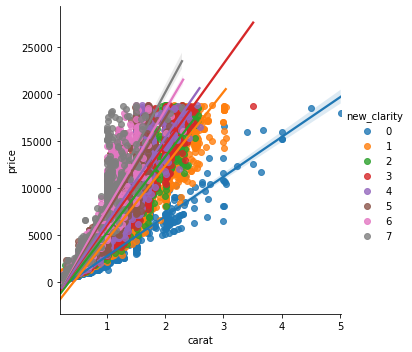

In [9]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_clarity')

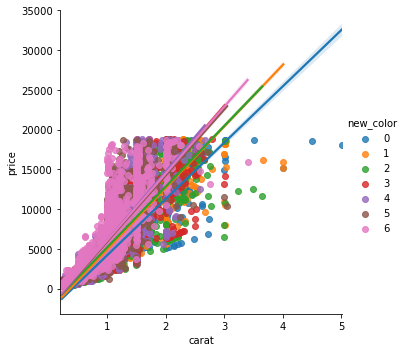

In [10]:
sns.lmplot(x='carat',y='price',data=diamond,hue='new_color')

In [11]:
diamond.drop(diamond.loc[(diamond['new_clarity'] == 0) | (diamond['new_cut'] == 0)].index,inplace=True)

# Spliting dataset in `Train` and `Test`

In [12]:
X = diamond[['carat','new_color','new_clarity','new_cut','z']]
y = diamond['price']

x_train, x_test, y_train, y_test = train_test_split(X,y)

# Adjusting null/zero

In [13]:
z_mean = round(x_train['z'].mean(),2)

In [14]:
x_train.loc[x_train['z'] == 0, 'z'] = z_mean

c:\program files\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Adjusting outlier's

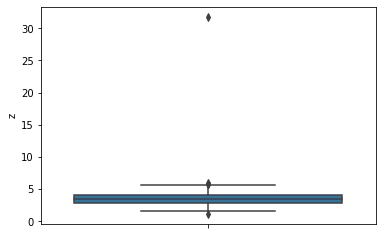

In [15]:
sns.boxplot(y=x_train['z'])

In [16]:
x_train.loc[x_train['z'] > 10]

,carat,new_color,new_clarity,new_cut,z
43882,0.51,5,4,2,31.8


In [17]:
x_train['z'].replace(to_replace=31.8,value=round(x_train['z'].mean(),2),inplace=True)

c:\program files\python38\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Multilinear Regression

In [18]:
model = LinearRegression()
scaler = StandardScaler()

scaler.fit(x_train)

std_x_train = scaler.transform(x_train)

model.fit(std_x_train,y_train)

std_x_test = scaler.transform(x_test)
predict = model.predict(std_x_test)

In [19]:
print(f'Root Mean Squared Error: {(np.sqrt(mean_squared_error(y_test, predict))).round()}')

Root Mean Squared Error: 1140.0


# Original Price Distribution X Predicted Distribution

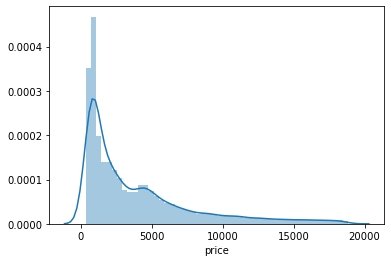

In [20]:
sns.distplot(y_train)

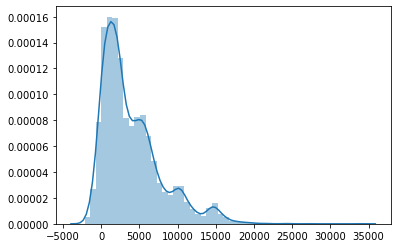

In [21]:
sns.distplot(predict)

# Let's predict for real 

In [22]:
rick = pd.read_csv('./rick_diamonds.csv')

rick['new_clarity'] = rick['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
rick['new_color'] = rick['color'].replace({'D':6, 'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
rick['new_cut']= rick['cut'].replace({'Fair':0,'Good':1,'Very Good': 2, 'Premium':3,'Ideal':4})

X = rick[['carat','new_color','new_clarity','new_cut','z']]

std_x = scaler.transform(X)
rick['price_predicted'] = (model.predict(std_x)).round()

rick['price_predicted'] = rick['price_predicted'].astype(int)
rick = rick.drop(columns=['new_clarity','new_color','new_cut'])
rick.to_csv('rick_predicted.csv',index=False)

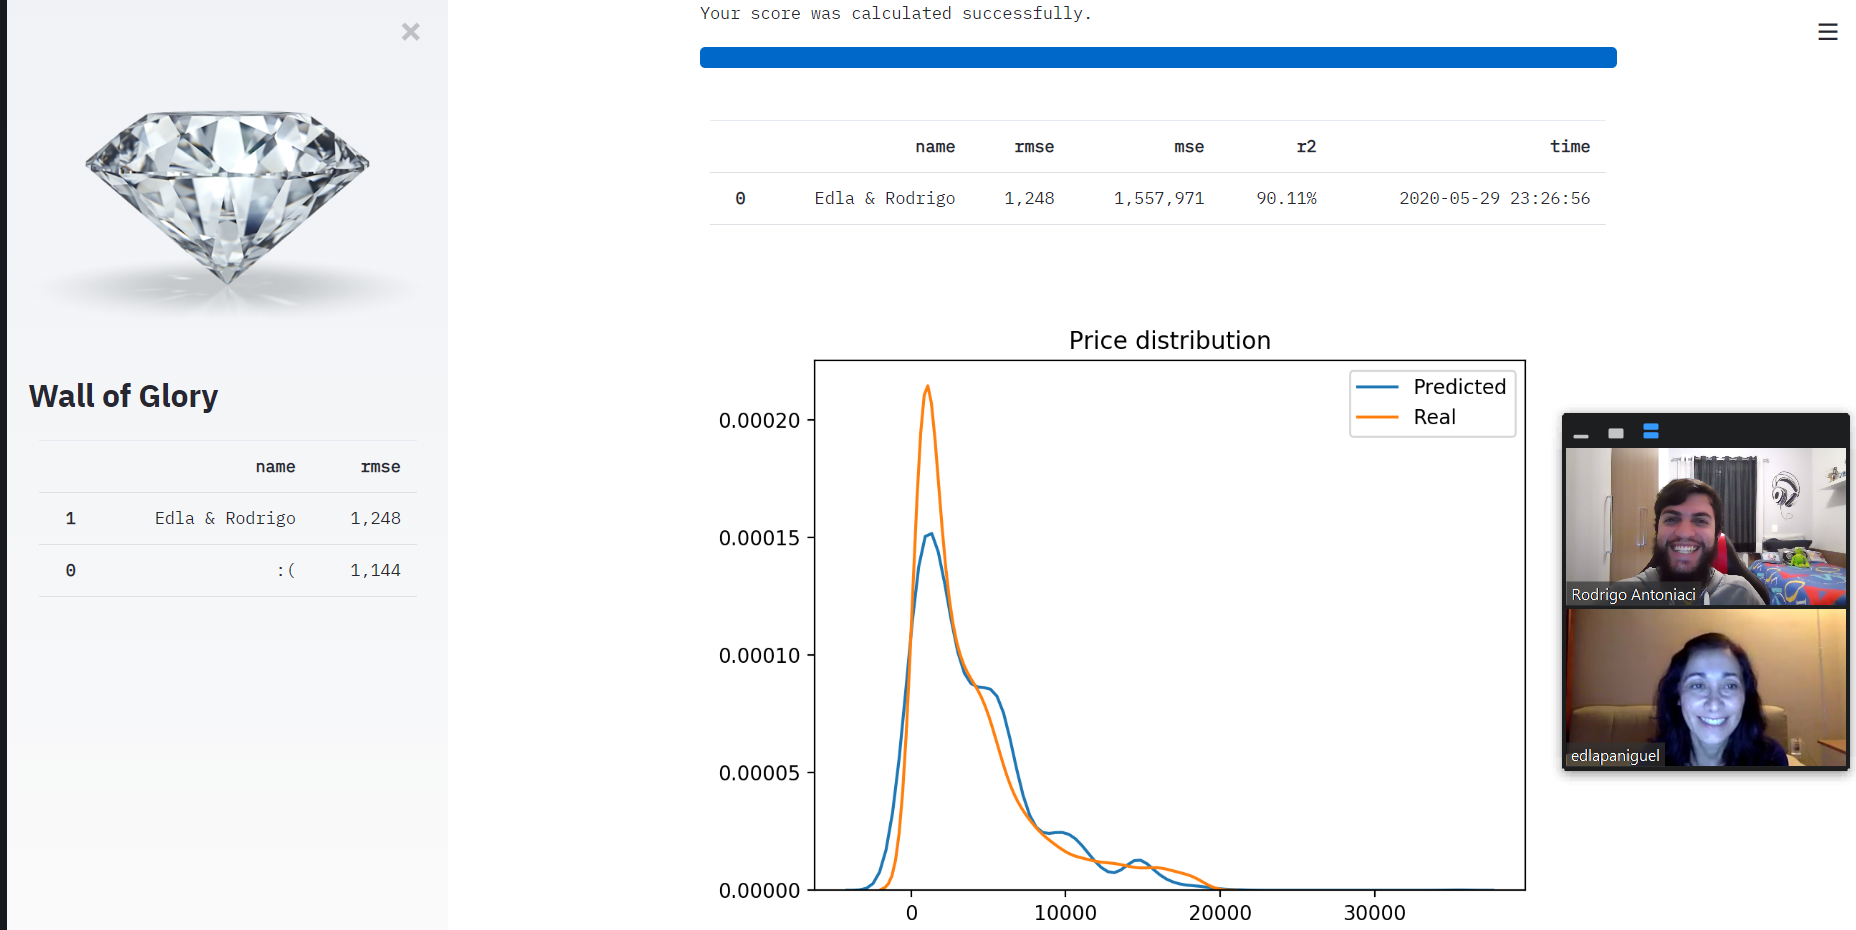